<a href="https://colab.research.google.com/github/Dkolomy/BMV-Research/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch end to end workflow
Link: https://www.learnpytorch.io/

In [61]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cpu'

## Data: preparing and loading

* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Mashine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.


In [62]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [63]:
### Splitting data into training and test set
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [64]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})


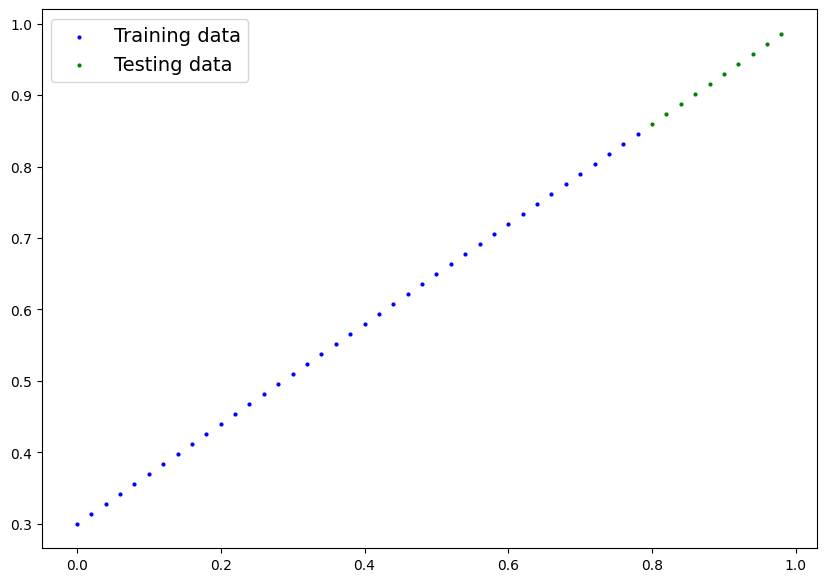

In [65]:
plot_predictions()

## 2. Build model

In [66]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias



## Model look training data and create ideal values

Through two main algorithms:
1. Gradient descent
2. Backpropogation

In [67]:
# Create a random seed
# torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.2345], requires_grad=True),
 Parameter containing:
 tensor([0.2303], requires_grad=True)]

In [68]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [69]:
## Making prediction torch.inference_mode()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.4179],
        [0.4226],
        [0.4273],
        [0.4320],
        [0.4367],
        [0.4413],
        [0.4460],
        [0.4507],
        [0.4554],
        [0.4601]])

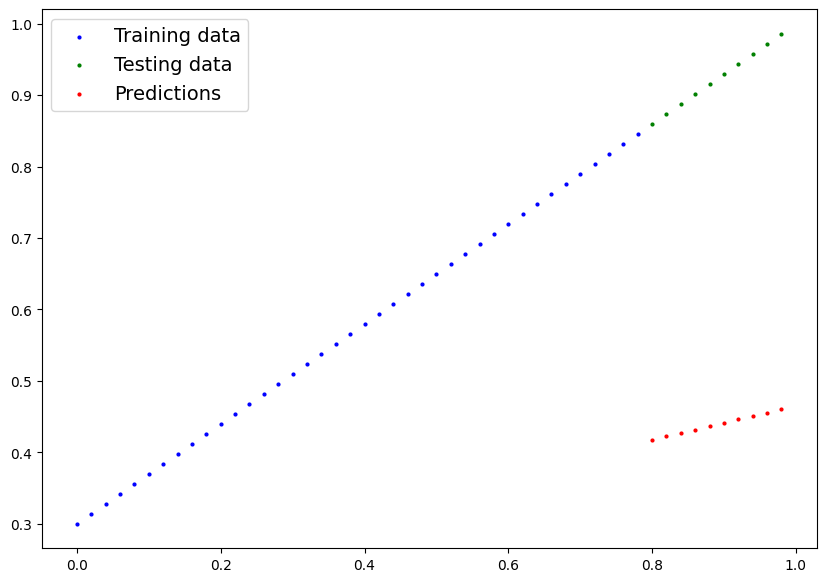

In [70]:
plot_predictions(predictions=y_preds)

In [71]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.2345], requires_grad=True),
 Parameter containing:
 tensor([0.2303], requires_grad=True)]

In [72]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [73]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

## Build a trainig loop in PyTorch

In [76]:
torch.manual_seed(42)

epochs = 200

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()

  # 1, Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropogation
  loss.backward()

  # 5. Step optimizer
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # 1 Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
      print(model_0.state_dict())


Epoch: 0 | Test: 0.011848028749227524 | Test loss: 0.02716878056526184
OrderedDict({'weight': tensor([0.6427]), 'bias': tensor([0.3238])})
Epoch: 10 | Test: 0.008417141623795033 | Test loss: 0.018896251916885376
OrderedDict({'weight': tensor([0.6599]), 'bias': tensor([0.3168])})
Epoch: 20 | Test: 0.00497832428663969 | Test loss: 0.010623705573379993
OrderedDict({'weight': tensor([0.6770]), 'bias': tensor([0.3098])})
Epoch: 30 | Test: 0.0033503472805023193 | Test loss: 0.004442447330802679
OrderedDict({'weight': tensor([0.6945]), 'bias': tensor([0.3093])})
Epoch: 40 | Test: 0.004330190364271402 | Test loss: 0.004442447330802679
OrderedDict({'weight': tensor([0.6945]), 'bias': tensor([0.3093])})
Epoch: 50 | Test: 0.004330190364271402 | Test loss: 0.004442447330802679
OrderedDict({'weight': tensor([0.6945]), 'bias': tensor([0.3093])})
Epoch: 60 | Test: 0.004330190364271402 | Test loss: 0.004442447330802679
OrderedDict({'weight': tensor([0.6945]), 'bias': tensor([0.3093])})
Epoch: 70 | Tes

In [75]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6411])), ('bias', tensor([0.3248]))])

In [57]:
weight, bias

(0.7, 0.3)

/tmp/ipython-input-1589356909.py:3: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="Train loss")


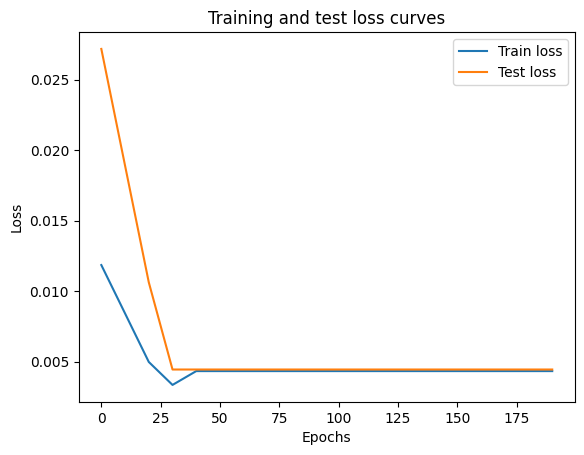

In [78]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
# Plot the loss curves